<a href="https://colab.research.google.com/github/imamfaisal21/DataScientist/blob/main/B62_Bakery_Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/bread_basket.csv")
df.head(12)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
5,3,Cookies,30-10-2016 10:07,morning,weekend
6,4,Muffin,30-10-2016 10:08,morning,weekend
7,5,Coffee,30-10-2016 10:13,morning,weekend
8,5,Pastry,30-10-2016 10:13,morning,weekend
9,5,Bread,30-10-2016 10:13,morning,weekend


In [ ]:
df["period_day"].value_counts()

afternoon    11569
morning       8404
evening        520
night           14
Name: period_day, dtype: int64

In [ ]:
df["period_day"].value_counts() / df.shape[0] * 100

afternoon    56.414883
morning      40.981128
evening       2.535720
night         0.068269
Name: period_day, dtype: float64

In [ ]:
df["weekday_weekend"].value_counts()

weekday    12807
weekend     7700
Name: weekday_weekend, dtype: int64

In [ ]:
df.groupby(["weekday_weekend", "period_day"])["Item"].count()

weekday_weekend  period_day
weekday          afternoon     7273
                 evening        356
                 morning       5174
                 night            4
weekend          afternoon     4296
                 evening        164
                 morning       3230
                 night           10
Name: Item, dtype: int64

In [ ]:
df.groupby(["weekday_weekend", "period_day"])["Item"].count() / df.shape[0] * 100

weekday_weekend  period_day
weekday          afternoon     35.465938
                 evening        1.735993
                 morning       25.230409
                 night          0.019506
weekend          afternoon     20.948944
                 evening        0.799727
                 morning       15.750719
                 night          0.048764
Name: Item, dtype: float64

In [ ]:
df["Item"].value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Bacon                1
Gift voucher         1
Olum & polenta       1
Raw bars             1
Polenta              1
Name: Item, Length: 94, dtype: int64

In [ ]:
count_df = pd.DataFrame(df["Item"].value_counts()).reset_index()
count_df.columns = ["Item", "Counts"]
count_df.head()

,Item,Counts
0,Coffee,5471
1,Bread,3325
2,Tea,1435
3,Cake,1025
4,Pastry,856


In [ ]:
count_df["Percentage"] = round(count_df["Counts"] / df.shape[0] * 100, 2)
count_df.head()

,Item,Counts,Percentage
0,Coffee,5471,26.68
1,Bread,3325,16.21
2,Tea,1435,7.00
3,Cake,1025,5.00
4,Pastry,856,4.17


In [ ]:
count_df["Percentage"].sum()

99.89000000000001

In [ ]:
# Treemap

import plotly.express as px

In [ ]:
fig = px.treemap(count_df,
                 path = [px.Constant("Transactions"), "Item"],
                 values = "Counts",
                 color = "Percentage",
                 color_continuous_scale = "RdBu")

fig.show()

In [ ]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [ ]:
df["date_time"].dtypes #Format kolom data item adalah object atau string

dtype('O')

In [ ]:
# Ubah format string pada kolom datetime menjadi datetime

df["date_time"] = pd.to_datetime(df["date_time"])
df["date_time"].dtypes

dtype('<M8[ns]')

In [ ]:
df["month"] = df["date_time"].dt.month
df["date"] = df["date_time"].dt.date
df["time"] = df["date_time"].dt.time
df["year"] = df["date_time"].dt.year
df["hour"] = df["date_time"].dt.hour
df["minute"] = df["date_time"].dt.minute
df["second"] = df["date_time"].dt.second
df["day"] = df["date_time"].dt.day

In [ ]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,date,time,year,hour,minute,second,day
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,2016-10-30,09:58:00,2016,9,58,0,30
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016-10-30,10:05:00,2016,10,5,0,30
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016-10-30,10:05:00,2016,10,5,0,30
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016-10-30,10:07:00,2016,10,7,0,30
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016-10-30,10:07:00,2016,10,7,0,30


In [ ]:
countByHour = df.groupby("hour")["Transaction"].count().reset_index()
countByHour.sort_values("hour", inplace=True)

<Axes: xlabel='hour', ylabel='Transaction'>

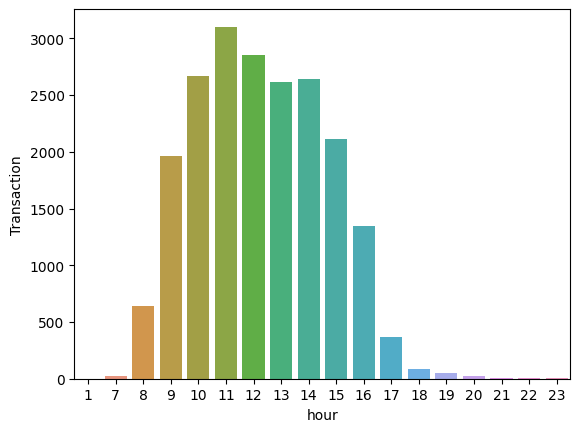

In [ ]:
import seaborn as sns
sns.barplot(x = countByHour["hour"],
            y = countByHour["Transaction"])

In [ ]:
df["day"].nunique()

25

In [ ]:
countByDay = df.groupby("day")["Transaction"].count().reset_index()
countByDay.sort_values("day", inplace=True)

<Axes: xlabel='day', ylabel='Transaction'>

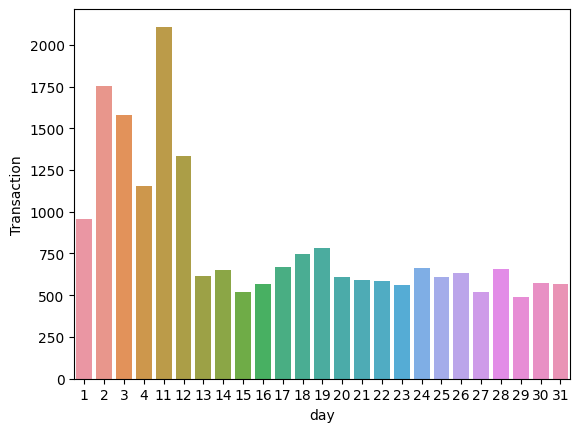

In [ ]:
import seaborn as sns
sns.barplot(x = countByDay["day"],
            y = countByDay["Transaction"])

In [ ]:
countByMonth = df.groupby("month")["Transaction"].count().reset_index()
countByMonth.sort_values("month", inplace=True)

<Axes: xlabel='month', ylabel='Transaction'>

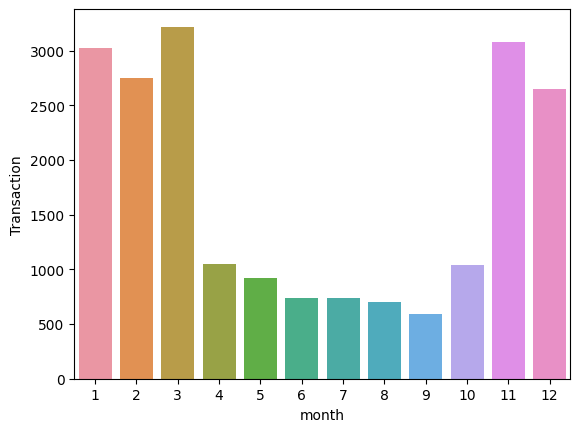

In [ ]:
import seaborn as sns
sns.barplot(x = countByMonth["month"],
            y = countByMonth["Transaction"])

In [ ]:
# Preproses data transaksi

transaction = df.groupby(["Transaction", "Item"])["Item"].count().reset_index(name = "Number of Item")
transaction.head(10)

,Transaction,Item,Number of Item
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
5,4,Muffin,1
6,5,Bread,1
7,5,Coffee,1
8,5,Pastry,1
9,6,Medialuna,1


In [ ]:
from pandas.core.frame import FillnaOptions
table = transaction.pivot_table(index = "Transaction",
                                columns = "Item",
                                values = "Number of Item",
                                aggfunc = "sum").fillna(0)
table

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encoding(value):
  if value == 0:
    return False
  return True

final_table = table.applymap(encoding)
final_table

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
!pip3 install mlxtend

In [ ]:
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
freq = apriori(final_table,
               min_support = 0.00015, use_colnames = True)

rules = association_rules(freq,
                          metric = "lift",
                          min_threshold = 3)

rules.sort_values("support", ascending=False,inplace=True)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
72,(Coke),(Sandwich),0.019440,0.071844,0.005177,0.266304,3.706722,0.003780,1.265043,0.744697
73,(Sandwich),(Coke),0.071844,0.019440,0.005177,0.072059,3.706722,0.003780,1.056705,0.786742
1356,(Juice),"(Coffee, Cookies)",0.038563,0.028209,0.003698,0.095890,3.399261,0.002610,1.074860,0.734129
1357,(Cookies),"(Juice, Coffee)",0.054411,0.020602,0.003698,0.067961,3.298730,0.002577,1.050812,0.736951
1354,"(Juice, Coffee)",(Cookies),0.020602,0.054411,0.003698,0.179487,3.298730,0.002577,1.152437,0.711512
...,...,...,...,...,...,...,...,...,...,...
3176,"(Toast, Bread, Brownie)",(Cake),0.000317,0.103856,0.000211,0.666667,6.419125,0.000178,2.688431,0.844483
3175,"(Toast, Brownie, Cake)",(Bread),0.000211,0.327205,0.000211,1.000000,3.056183,0.000142,inf,0.672937
3174,"(Toast, Bread, Cake)",(Brownie),0.000528,0.040042,0.000211,0.400000,9.989446,0.000190,1.599930,0.900370
3173,(Brownie),"(Spanish Brunch, Bread, Cake)",0.040042,0.000634,0.000211,0.005277,8.324538,0.000186,1.004668,0.916575


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

